In [76]:
import numpy as np
from glob import glob
import os

In [77]:
ls ../monit_npy/

nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_10/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_11/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_12/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_13/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_14/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_15/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_16/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_17/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_18/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_19/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_2/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_20/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_21/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_22/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_23/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_24/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_25/
nn_rhorho_Varia

In [25]:
filenames = [f'../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_{i}' for i in range(2,51)]

In [21]:
ls ../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_50

softmax_calc_w.npy   softmax_preds_w.npy


In [22]:
filenames[0]

'../nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_2'

In [100]:
def calculate_metrics(directory, num_class):
    calc_w = np.load(os.path.join(directory, 'softmax_calc_w.npy'))
    preds_w = np.load(os.path.join(directory, 'softmax_preds_w.npy'))
    pred_arg_maxs = np.argmax(preds_w, axis=1)
    calc_arg_maxs = np.argmax(calc_w, axis=1)
    calc_pred_argmaxs_distances = np.min(
       np.stack(
           [np.abs(pred_arg_maxs-calc_arg_maxs), (num_class - np.abs(pred_arg_maxs-calc_arg_maxs))]
       ), axis=0)
    acc0 = (calc_pred_argmaxs_distances <= 0).mean()
    acc1 = (calc_pred_argmaxs_distances <= 1).mean()
    acc2 = (calc_pred_argmaxs_distances <= 2).mean()
    acc3 = (calc_pred_argmaxs_distances <= 3).mean()
    
    mse = np.mean(calc_pred_argmaxs_distances)
    l1_delta_w = np.mean(np.abs(calc_w - preds_w))/num_class
    l2_delta_w = np.sqrt(np.mean((calc_w - preds_w)**2))/num_class
    
    return np.array([acc0, acc1, acc2, acc3, mse, l1_delta_w, l2_delta_w])

In [101]:
metrics = [calculate_metrics(filenames[i], i+2) for i in range(49)]

In [102]:
import matplotlib.pyplot as plt

In [103]:
metrics = np.stack(metrics)

# Accuracy

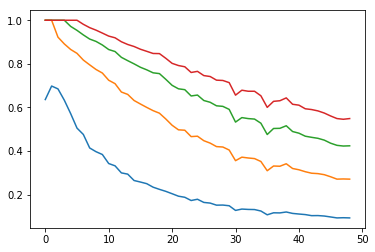

In [70]:
plt.plot(metrics[:, 0])
plt.plot(metrics[:, 1])
plt.plot(metrics[:, 2])
plt.plot(metrics[:, 3])


# MSE

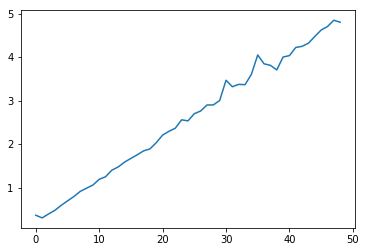

In [71]:
plt.plot(metrics[:, 4])



# L1 Distance

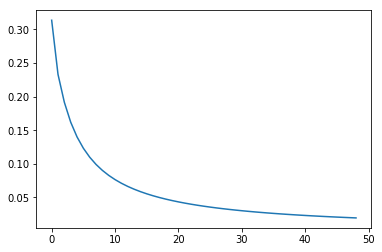

In [104]:
plt.plot(metrics[:, 5])

# L2 Distance

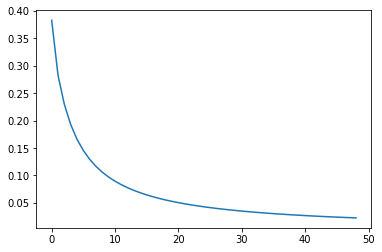

In [105]:
plt.plot(metrics[:, 6])

In [95]:
def plot_distr(directory, num_class):
    calc_w = np.load(os.path.join(directory, 'softmax_calc_w.npy'))
    preds_w = np.load(os.path.join(directory, 'softmax_preds_w.npy'))
    pred_arg_maxs = np.argmax(preds_w, axis=1)
    calc_arg_maxs = np.argmax(calc_w, axis=1)
    calc_pred_argmaxs_distances = np.min(
       np.stack(
           [np.abs(pred_arg_maxs-calc_arg_maxs), (num_class - np.abs(pred_arg_maxs-calc_arg_maxs))]
       ), axis=0)
    plt.hist(calc_pred_argmaxs_distances, bins=100)
    

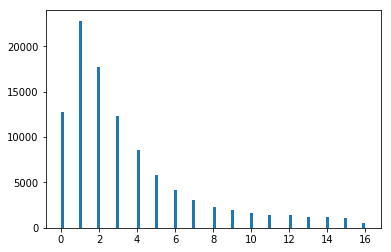

In [99]:
i = 30
plot_distr(filenames[i], i+2)